# exploring the data

In [3]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
from pmdarima import  auto_arima
import json
import matplotlib.pyplot as plt
%matplotlib inline

first let's take a few sample datasets, and experiment with them

In [4]:
import Reviews_Scrapper.Scrapper.myScrapper as myScrapper

## chromedriver PATH
PATH  =  'C:\Program Files (x86)\chromedriver.exe'

### IMPORTANT
scrapper  =  myScrapper.Scrapper(PATH)

#Google Maps
sample1  =  scrapper.read_google_maps_reviews(URL='https://www.google.com/search?q=%D8%B2%D9%85%D9%83%D8%A7%D9%86+%D9%83%D8%A7%D9%81%D9%8A%D9%87&sxsrf=ALiCzsYDG_INZfccQBasE3ySqrb4Ga7hgw%3A1651878690215&ei=Iqt1YvPWDMSYa5CTjvgO&ved=0ahUKEwjz76rU_8v3AhVEzBoKHZCJA-8Q4dUDCA4&uact=5&oq=%D8%B2%D9%85%D9%83%D8%A7%D9%86+%D9%83%D8%A7%D9%81%D9%8A%D9%87&gs_lcp=Cgdnd3Mtd2l6EAMyCwguEMcBEK8BEMsBOgcIIxCwAxAnOgcIABBHELADOgYIIxAnEBM6CgguEMcBEK8BEBM6CAgAEBYQHhATOgoIABAWEAoQHhATOggIABAWEAoQHjoHCCMQsAIQJzoOCC4QxwEQrwEQFhAeEBNKBAhBGABKBAhGGABQ9A9YtRpgjRxoA3ABeACAAb0BiAHvBpIBAzAuNZgBAKABAcgBBsABAQ&sclient=gws-wiz#lrd=0x3e2ee345a99be79d:0xfca30a963ba4e6cb,1,,,')
sample2  =  scrapper.read_google_maps_reviews(URL='https://www.google.com/search?q=black+brew+cafe+%D8%A7%D9%84%D8%B9%D8%A7%D8%B1%D8%B6%D8%8C+%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6&ei=_A16Yo2xOc3IlwSz1LTAAw&ved=0ahUKEwiNn8O_rtT3AhVN5IUKHTMqDTgQ4dUDCA4&uact=5&oq=black+brew+cafe+%D8%A7%D9%84%D8%B9%D8%A7%D8%B1%D8%B6%D8%8C+%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6CQghEAoQoAEQKkoECEEYAEoECEYYAFDbAVi7D2CbFWgBcAF4AIABrgGIAagDkgEDMC4zmAEAoAECoAEByAEIwAEB&sclient=gws-wiz#lrd=0x3e2ee50e9e562c9f:0x6ce8fa0b28c5d5ec,1,,,')
sample3  =  scrapper.read_google_maps_reviews(URL='https://www.google.com/search?q=%D9%85%D8%B7%D8%B9%D9%85+%D8%AA%D8%B4%D8%B1%D9%8A%D9%86+%D8%B3%D8%B9%D9%8A%D8%AF+%D8%A8%D9%86+%D8%B2%D9%8A%D8%A7%D8%AF%D8%8C&oq=%D9%85%D8%B7%D8%B9%D9%85+%D8%AA%D8%B4%D8%B1%D9%8A%D9%86+%D8%B3%D8%B9%D9%8A%D8%AF+%D8%A8%D9%86+%D8%B2%D9%8A%D8%A7%D8%AF%D8%8C&aqs=chrome..69i57.1072j0j9&sourceid=chrome&ie=UTF-8#lrd=0x3e2efdf52e78af8b:0xbc4d425d6b3cba41,1,,,')
sample4  =  scrapper.read_google_maps_reviews(URL='https://www.google.com/search?q=%D9%82%D8%A7%D8%B5%D8%AF+%D8%AE%D9%8A%D8%B1+%D9%84%D9%84%D9%85%D8%A7%D9%83%D9%88%D9%84%D8%A7%D8%AA+%D8%A7%D9%84%D8%AE%D9%8A%D8%B1%D9%8A%D8%A9&oq=%D9%82%D8%A7%D8%B5%D8%AF+%D8%AE%D9%8A%D8%B1+%D9%84%D9%84%D9%85%D8%A7%D9%83%D9%88%D9%84%D8%A7%D8%AA+%D8%A7%D9%84%D8%AE%D9%8A%D8%B1%D9%8A%D8%A9&aqs=chrome..69i57.11232j0j7&sourceid=chrome&ie=UTF-8#lrd=0x3e2efd9a9a83c343:0x9ec3580f8d33f1ca,1,,,')

Google Maps Scrapper
Google Maps Scrapper
Google Maps Scrapper
Google Maps Scrapper


In [5]:
print(f'length of first sample dataset:{len(sample1)}')
print(f'length of second sample dataset:{len(sample2)}')
print(f'length of third sample dataset:{len(sample3)}')
print(f'length of fourth sample dataset:{len(sample4)}')

length of first sample dataset:397
length of second sample dataset:121
length of third sample dataset:243
length of fourth sample dataset:323


In [6]:
# covert lists to dataframes
df_sample1 = pd.DataFrame(sample1)
df_sample2 = pd.DataFrame(sample2)
df_sample3 = pd.DataFrame(sample3)
df_sample4 = pd.DataFrame(sample4)

In [7]:
df_sample2.head(20)

,rating,date,text,username
0,5.0,a year ago,I liked the place a lot and the employees were...,Shahad Tariq
1,3.0,a month ago,Price is high with compared with other coffee ...,Ba al
2,5.0,6 months ago,"Amazing coffee, very nice staff reasonable pri...",sultan bin othman
3,5.0,7 months ago,The coffee beans are unique &the loyalty progr...,Anas Asiri
4,5.0,4 months ago,Nice,Wjdan Fahad
5,5.0,3 months ago,Great place,hala alwaely
6,4.0,9 months ago,(Translated by Google) A nice quiet little caf...,Maryam AL-Salman
7,5.0,3 months ago,"(Translated by Google) In fact, they deserve m...",Arwa Alrasheed
8,5.0,4 months ago,(Translated by Google) Very excellent literall...,Abdulaziz
9,4.0,11 months ago,"(Translated by Google) Sweet soul. A special, ...",Mema


let's drop text and uesrname as they are of no intrest to us

In [8]:
df_sample1.drop(['text', 'username'], axis=1, inplace=True)
df_sample2.drop(['text', 'username'], axis=1, inplace=True)
df_sample3.drop(['text', 'username'], axis=1, inplace=True)
df_sample4.drop(['text', 'username'], axis=1, inplace=True)

In [9]:
df_sample2.head(20)

,rating,date
0,5.0,a year ago
1,3.0,a month ago
2,5.0,6 months ago
3,5.0,7 months ago
4,5.0,4 months ago
5,5.0,3 months ago
6,4.0,9 months ago
7,5.0,3 months ago
8,5.0,4 months ago
9,4.0,11 months ago


now we can see a clear problem google maps dates is not specific and only give one value e.g, day, week, month.

this make it very hard to collect daily data, but since our target is mostly small and meduim business, which in any case would have a diffculty to generate a review in daily bases.

and here comes the question to take the avarge monthly rating, or the yearly avarge?

I oupted to use the monthly avarage, since it would be more helpfull to both new and old business.

# Preprocessing

first we want to convert the text to date, specifying the month and year, to do that we would use timedelta for dealing with days and weeks, and relativedelta for dealing with months

In [10]:
print(f'today date is: {date.today()}')
print(f'date a day ago from today: {date.today() - timedelta(days=1)}')
print(f'date a week ago from today: {date.today() - timedelta(weeks=1)}')
print(f'date a month ago from today: {date.today() - relativedelta(months=1)}')

today date is: 2022-05-27
date a day ago from today: 2022-05-26
date a week ago from today: 2022-05-20
date a month ago from today: 2022-04-27


In [11]:
# subtacting months from today date and returning a str with the year and month e.g.2022/04
def subtract_months(months):
    return (date.today() - relativedelta(months=months)).strftime('%Y/%m')
# subtacting weeks from today date and returning a str with the year and month e.g.2022/04
def subtract_weeks(weeks):
    return (date.today() - timedelta(weeks=weeks)).strftime('%Y/%m')
# subtacting days from today date and returning a str with the year and month e.g.2022/04
def subtract_days(days):
    return (date.today() - timedelta(days=days)).strftime('%Y/%m')

In [12]:
# a dictionary to map the date texts to a str with the month and year e.g. a month ago to 2022/04
text_to_date = {
    'a month ago': subtract_months(1),
    '2 months ago': subtract_months(2),
    '3 months ago': subtract_months(3),
    '4 months ago': subtract_months(4),
    '5 months ago': subtract_months(5),
    '6 months ago': subtract_months(6),
    '7 months ago': subtract_months(7),
    '8 months ago': subtract_months(8),
    '9 months ago': subtract_months(9),
    '10 months ago': subtract_months(10),
    '11 months ago': subtract_months(11),
    'a week ago': subtract_weeks(1),
    '2 weeks ago': subtract_weeks(2),
    '3 weeks ago': subtract_weeks(3),
    '4 weeks ago': subtract_weeks(4),
    'a day ago': subtract_days(1),
    '2 days ago': subtract_days(2),
    '3 days ago': subtract_days(3),
    '4 days ago': subtract_days(4),
    '5 days ago': subtract_days(5),
    '6 days ago': subtract_days(6),
}

before we convert the dates let's drop any date not in the dictionary keys, since dates outside of this range is gonna be ambiguous e.g., a year ago

In [13]:
df_sample1 = df_sample1[df_sample1['date'].isin(text_to_date.keys())]
df_sample2 = df_sample2[df_sample2['date'].isin(text_to_date.keys())]
df_sample3 = df_sample3[df_sample3['date'].isin(text_to_date.keys())]
df_sample4 = df_sample4[df_sample4['date'].isin(text_to_date.keys())]

In [14]:
df_sample2.head(5)

,rating,date
1,3.0,a month ago
2,5.0,6 months ago
3,5.0,7 months ago
4,5.0,4 months ago
5,5.0,3 months ago


we can see that the fist row which had a data of a year ago is dropped so we are good to go, now let's convert the text to month and year

In [15]:
df_sample1["date"].replace(text_to_date, inplace=True)
df_sample2["date"].replace(text_to_date, inplace=True)
df_sample3["date"].replace(text_to_date, inplace=True)
df_sample4["date"].replace(text_to_date, inplace=True)

In [16]:
df_sample2.head(5)

,rating,date
1,3.0,2022/04
2,5.0,2021/11
3,5.0,2021/10
4,5.0,2022/01
5,5.0,2022/02


In [17]:
df_sample1 = df_sample1.groupby(['date']).mean()
df_sample2 = df_sample2.groupby(['date']).mean()
df_sample3 = df_sample3.groupby(['date']).mean()
df_sample4 = df_sample4.groupby(['date']).mean()

In [18]:
df_sample1

,rating
date,
2021/06,4.476190
2021/07,4.500000
2021/08,4.160000
2021/09,4.428571
2021/10,4.526316
2021/11,4.692308
2021/12,4.714286
2022/01,4.615385
2022/02,3.818182


In [19]:
df_sample2

,rating
date,
2021/06,4.857143
2021/07,5.000000
2021/08,4.583333
2021/09,5.000000
2021/10,4.833333
2021/11,5.000000
2021/12,4.750000
2022/01,4.700000
2022/02,5.000000


In [20]:
df_sample3

,rating
date,
2021/06,5.000000
2021/07,5.000000
2021/08,4.283019
2021/09,3.954545
2021/10,3.666667
2021/11,3.900000
2021/12,3.800000
2022/01,3.400000
2022/02,4.647059


In [21]:
df_sample4

,rating
date,
2021/06,4.500000
2021/07,4.750000
2021/08,3.300000
2021/09,4.466667
2021/10,4.714286
2021/11,4.642857
2021/12,4.125000
2022/01,5.000000
2022/02,3.714286


we can see that the second and fourth sample doesn't have any data in this month which is 2022/05 let's deal with this case and a case in which there was a missing value in the middle too, let's start first with completing the dataframe with the rating of null later on we would test the possible values to fill the null

In [22]:
def complete_months(df):
    complete_year = []
    # appending today month and year e.g., 2022/05
    complete_year.append(date.today().strftime('%Y/%m'))
    # appending the past 11 months from the current month
    for i in range(11):
        complete_year.append(subtract_months(i+1))
    # create an array with nan values to be the dataframe values with the complete year being the index
    nan_array = np.empty((12, 1))
    nan_array[:] = np.nan
    # creating a dataframe with complete year as index and nan values
    df_complete_year = pd.DataFrame(nan_array, index=complete_year, columns=['rating'])
    # getting the missing months from the dataframe
    missing_months = df_complete_year.index.difference(df.index)
    # appending missing months to the dataframe
    df = pd.concat((df, df_complete_year.loc[missing_months, :]))
        
    return df
    

In [23]:
df_sample1 = complete_months(df_sample1)
df_sample2 = complete_months(df_sample2)
df_sample3 = complete_months(df_sample3)
df_sample4 = complete_months(df_sample4)

In [24]:
df_sample1

,rating
2021/06,4.476190
2021/07,4.500000
2021/08,4.160000
2021/09,4.428571
2021/10,4.526316
2021/11,4.692308
2021/12,4.714286
2022/01,4.615385
2022/02,3.818182
2022/03,4.857143


In [25]:
df_sample4

,rating
2021/06,4.500000
2021/07,4.750000
2021/08,3.300000
2021/09,4.466667
2021/10,4.714286
2021/11,4.642857
2021/12,4.125000
2022/01,5.000000
2022/02,3.714286
2022/03,4.000000


we can see that the complete dataframes wouldn't change but a dataframe with missing months is gonna be completed.

# exploring the data

sample 1


c:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


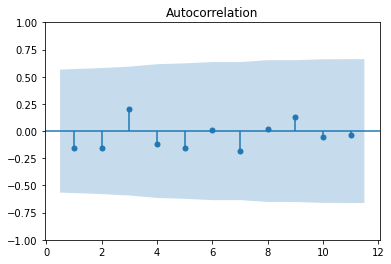

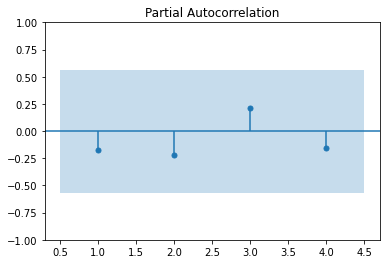

In [26]:
print('sample 1')
plot_acf(df_sample1, zero=False)
plot_pacf(df_sample1, lags=int(len(df_sample1)*0.4), zero=False)
plt.show()

sample 2


c:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


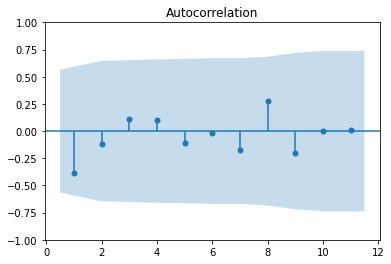

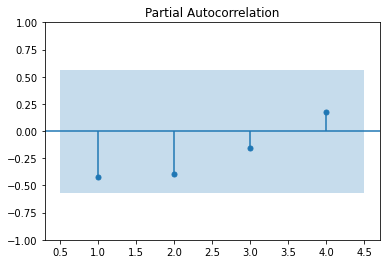

In [27]:
print('sample 2')
plot_acf(df_sample2, zero=False)
plot_pacf(df_sample2, lags=int(len(df_sample2)*0.4), zero=False)
plt.show()

sample 3


c:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


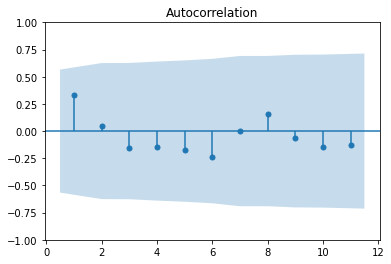

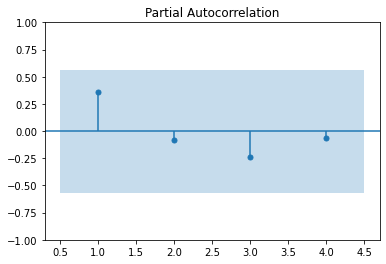

In [28]:
print('sample 3')
plot_acf(df_sample3, zero=False)
plot_pacf(df_sample3, lags=int(len(df_sample3)*0.4), zero=False)
plt.show()

sample 4


c:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
c:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


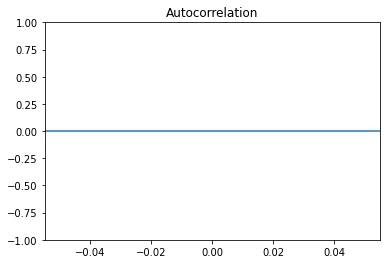

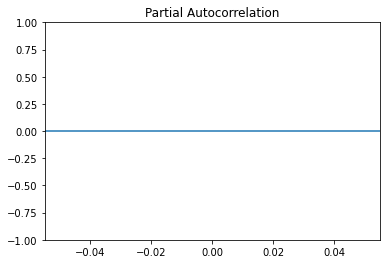

In [29]:
print('sample 4')
plot_acf(df_sample4, zero=False)
plot_pacf(df_sample4, lags=int(len(df_sample4)*0.4), zero=False)
plt.show()

the number of data points is low, and there's not much of a pattern when it comes to ratings, so I was afraid that no lag values would be appropriate, and the results turned out to be what I though, all values other than 0 are not optimal.

but that's okay since this number of data points are only temporary, we are gonna collect more helpful data in the future, so for now let's try arima, AR, and MA, then we can see which one of them performs the best.

# building the model

since we are building a time series forecasting model, the first model to come in mind is ARIMA, this is espically true since we are gonna build a model for each resturent/cafe, and since ARIMA hyper parameters mainly (p,d,q) is limited, let's do a simple grid search for each dataset,

In [30]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        try:
            model = ARIMA(history, order=arima_order, enforce_invertibility=False, enforce_stationarity=False)
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        except np.linalg.LinAlgError:
#             print(f'fitting problem {arima_order}')
            pass
    try:
        error = mean_squared_error(test, predictions)
    except ValueError:
        error = float("inf")
    
    return error

In [31]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [32]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")
evaluate_models(df_sample2.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.176
ARIMA(0, 0, 1) MSE=0.144
Best ARIMA(0, 0, 1) MSE=0.144


first of all somtimes the auto_arima gives the following error massege "Schur decomposition solver error.", this is normal and happens When the AR polynomial is close to be non-stationary or when the MA polynomial is close to be non-invertible, then the model is rejected by setting an infinite value for the AIC related to that model, and since we are doing a search in a large number of possiable values this wouldn't be a problem.

this takes a lot of time to function so when I was looking for a better way to implement the search for arima modelsm I found auto arima in pmdarima package, which provides a stepwise seach and many other benefits so let's try it out.

In [33]:
warnings.filterwarnings("default")
stepwise_fit = auto_arima(
    df_sample2.values,
    start_p=0,
    start_q=0,
    max_p=6,
    max_q=6,
    start_P=0,
    start_Q=0,
    max_P=6,
    max_Q=6,
    random_state=12,
#     d = 2,
#     stationary=True, 
    # seasonal=True, 
    # m=4,
    # D=None,
    # seasonal_test='ch',
    trace=True,
    stepwise=True  
)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.526, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7.631, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=73.794, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7.699, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.240 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                        SARIMAX   Log Likelihood                  -1.763
Date:                Fri, 27 May 2022   AIC                              7.526
Time:                        21:12:50   BIC                              8.495
Sample:                             0   HQIC                             7.167
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.8103      0.157     30.683      0.000       4.503       5.118
sigma2         0.0785      0.039      1.992      0.046       0.001       0.156
===================================================================================
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):                11.69
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               6.08   Skew:                            -1.91
Prob(H) (two-sided):                  0.11   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

great this provide for me all I needed after experimnting a little bit I choose thoose parameters for the auto arima based in the following facts:

for costumer opinion you would rarely find a strong seasonality in it espicially since in our case we are only intrested in the avarage of the last 12 months, if we try to look for one just in case a resturent/cafe may have a seasonailty, it would get more computationally intensive from my testing it takes around 2-3 times more, if seasonality is included, which is not worth it.

from my reasearch the avarge of last 12 months of costumer opinion for resturents&cafes, is mostly constent with minume deviation and that's why in all 4 sample when looking for a d (differencing) value, to transform the data to stationary state (a series with a constant mean, standard deviation over time), the choosen value is 0, which basicly means the data is already stationary.

but I am gonna still use it because sometimes there's a trend or a certian cyclic behavior in which using, d (differencing) in ARIME model can help capture them.

now let's build the complete function which would take as in input a JSON file with the rating and date, and return the avarge for the last 12 moneth plus the forecast for the next 3 months.

In [34]:
def time_series_forecasting(json, seasonality=False): 
    # reading the data
    df = pd.read_json(json)
    # remove dates outside of the dictionary e.g., a year ago
    df = df[df['date'].isin(text_to_date.keys())]
    # transform the dates from text to a text with the year and month e.g., a month ago --> 2022/04
    df["date"].replace(text_to_date, inplace=True)
    # getting the avarage rating for each month in the last year
    df = df.groupby(['date']).mean()
    # making sure there's at least 4 months with ratings
    if len(df) < 4:
        return None
    # compelte months with no rating, with nan values for now
    df = complete_months(df)
    # if there's months with no ratings at the start or end of the dataframe drop them
    first_idx = df.first_valid_index()
    last_idx = df.last_valid_index()
    df = df.loc[first_idx:last_idx]
    # filling missing values (months with no ratings) in the middle
    df.fillna(method='bfill', inplace=True)



    df = df[:int(df.shape[0] * 0.8)]



    warnings.filterwarnings("ignore")
    if seasonality:
        stepwise_fit = auto_arima(
            df.values.flatten(),
            start_p=0,
            start_q=0,
            max_p=6,
            max_q=6,
            start_P=0,
            start_Q=0,
            max_P=6,
            max_Q=6,
            random_state=12,
            seasonal=True, 
            m=4,
            D=None,
            seasonal_test='ch',
            stepwise=True 
        )
    else:
        stepwise_fit = auto_arima(
            df.values.flatten(),
            start_p=0,
            start_q=0,
            max_p=6,
            max_q=6,
            random_state=12, 
            seasonal=False,
            stepwise=True,
        )
    
    time_series = df.values.flatten().tolist()
    forecasting = np.array(stepwise_fit.predict(3)).tolist()

    result = {
        "last_year_monthly_mean": time_series,
        "future_forecasting": forecasting
    }
    

    return result

In [35]:
data_json = json.dumps(sample1)
pred_sample1 = time_series_forecasting(data_json, seasonality=True)
data_json = json.dumps(sample2)
pred_sample2 = time_series_forecasting(data_json, seasonality=True)
data_json = json.dumps(sample3)
pred_sample3 = time_series_forecasting(data_json, seasonality=True)
data_json = json.dumps(sample4)
pred_sample4 = time_series_forecasting(data_json, seasonality=True)

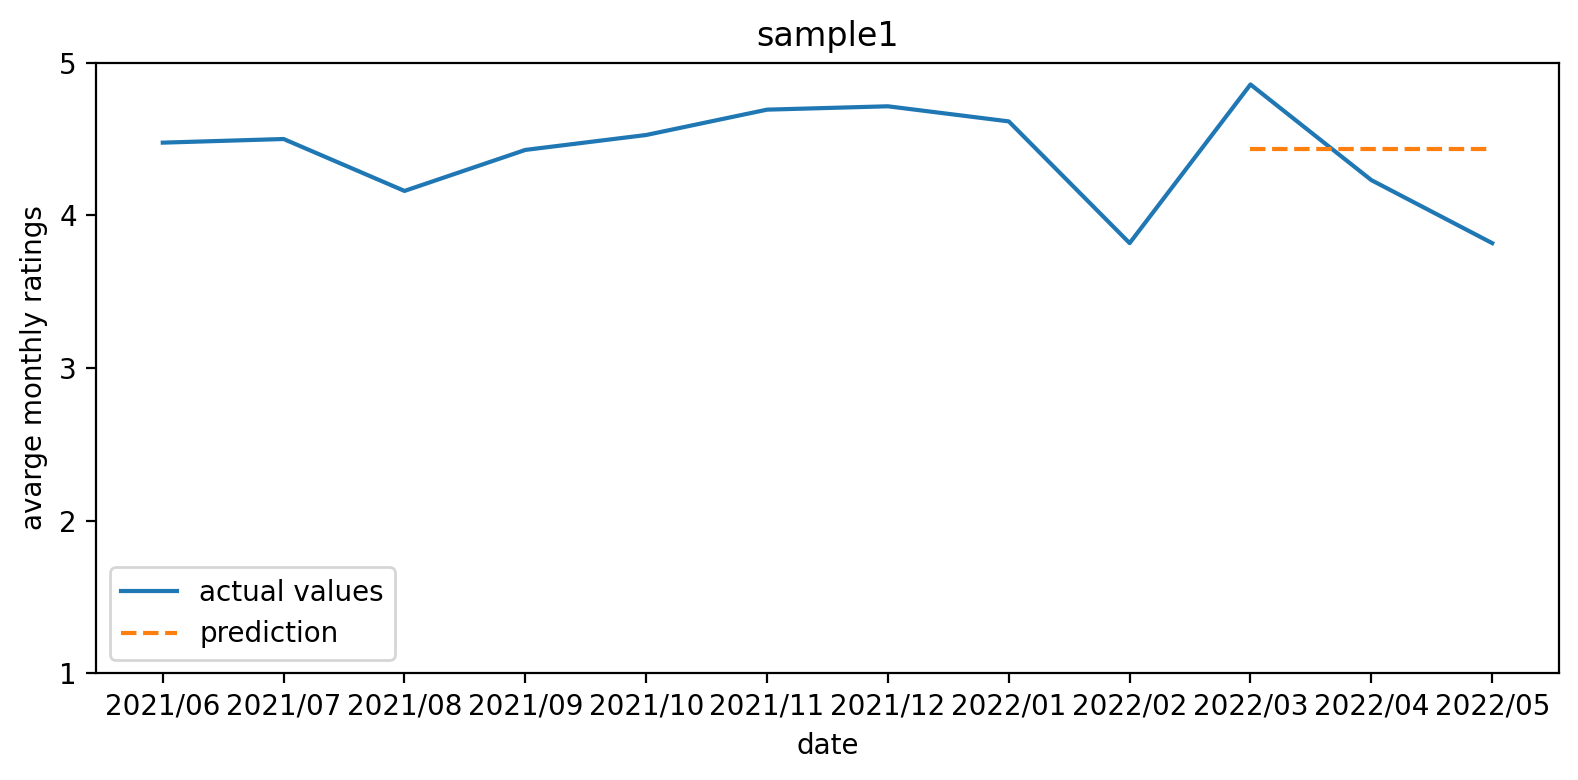

In [36]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample1.dropna(axis=0, inplace=True)
last_year_dates = df_sample1.index.to_list()
dates_last_months = df_sample1.index.to_list()[-3:]
last_year_monthly_mean = df_sample1.values.flatten().tolist()


ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample1['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample1')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

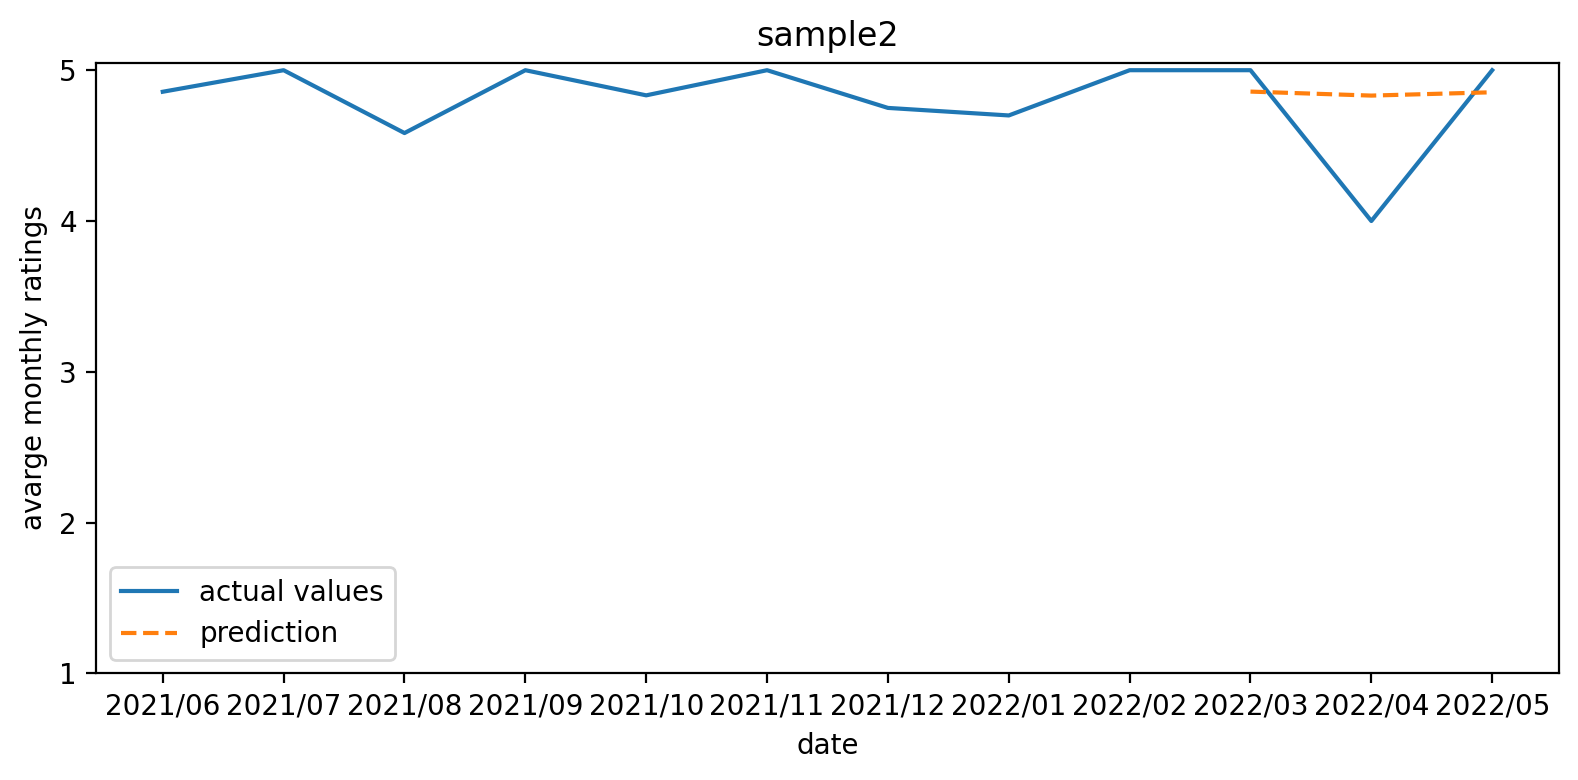

In [37]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample2.dropna(axis=0, inplace=True)
last_year_dates = df_sample2.index.to_list()
dates_last_months = df_sample2.index.to_list()[-3:]
last_year_monthly_mean = df_sample2.values.flatten().tolist()

ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample2['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample2')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

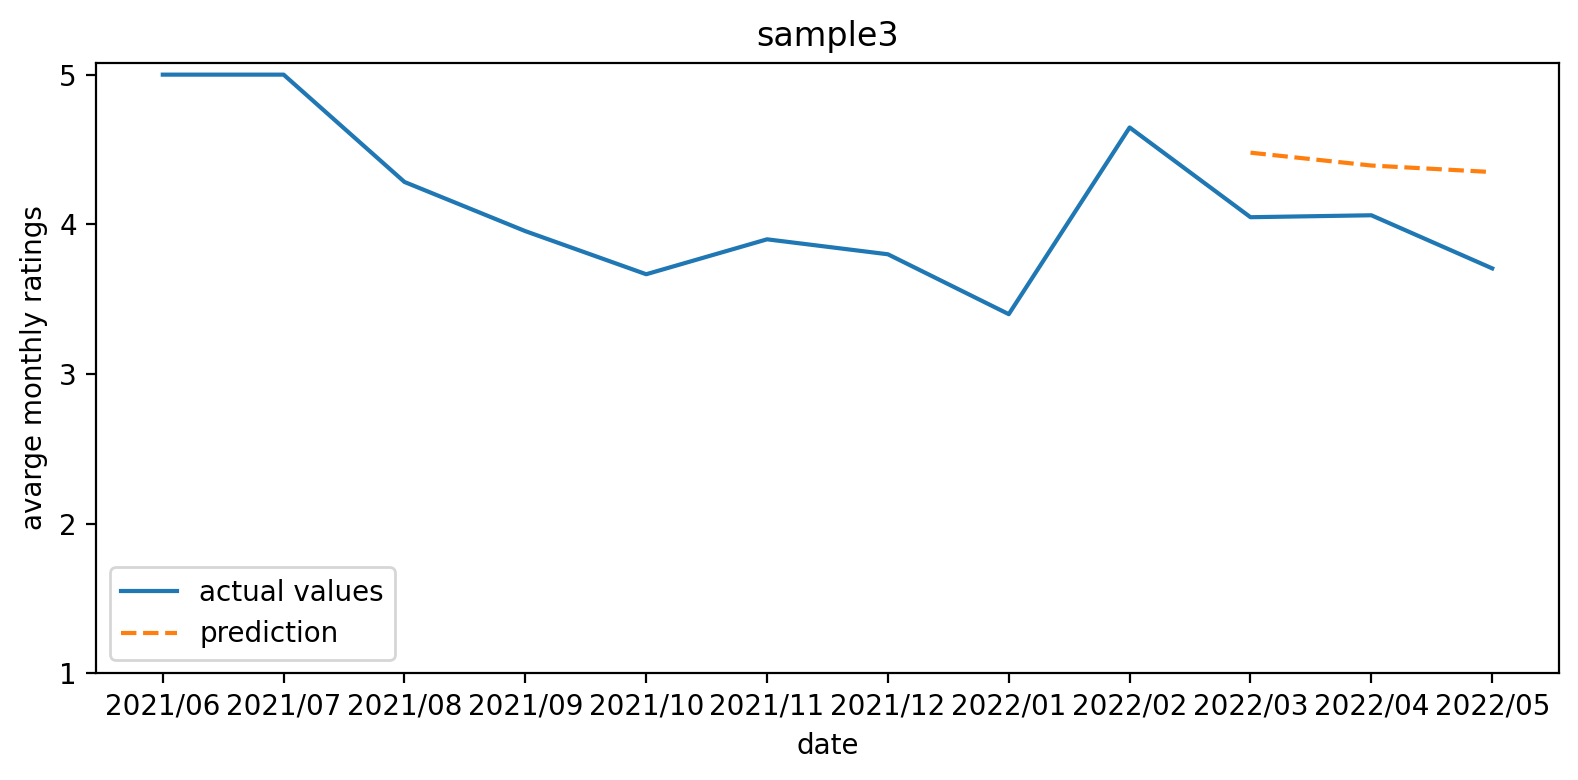

In [38]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample3.dropna(axis=0, inplace=True)
last_year_dates = df_sample3.index.to_list()
dates_last_months = df_sample3.index.to_list()[-3:]
last_year_monthly_mean = df_sample3.values.flatten().tolist()


ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample3['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample3')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

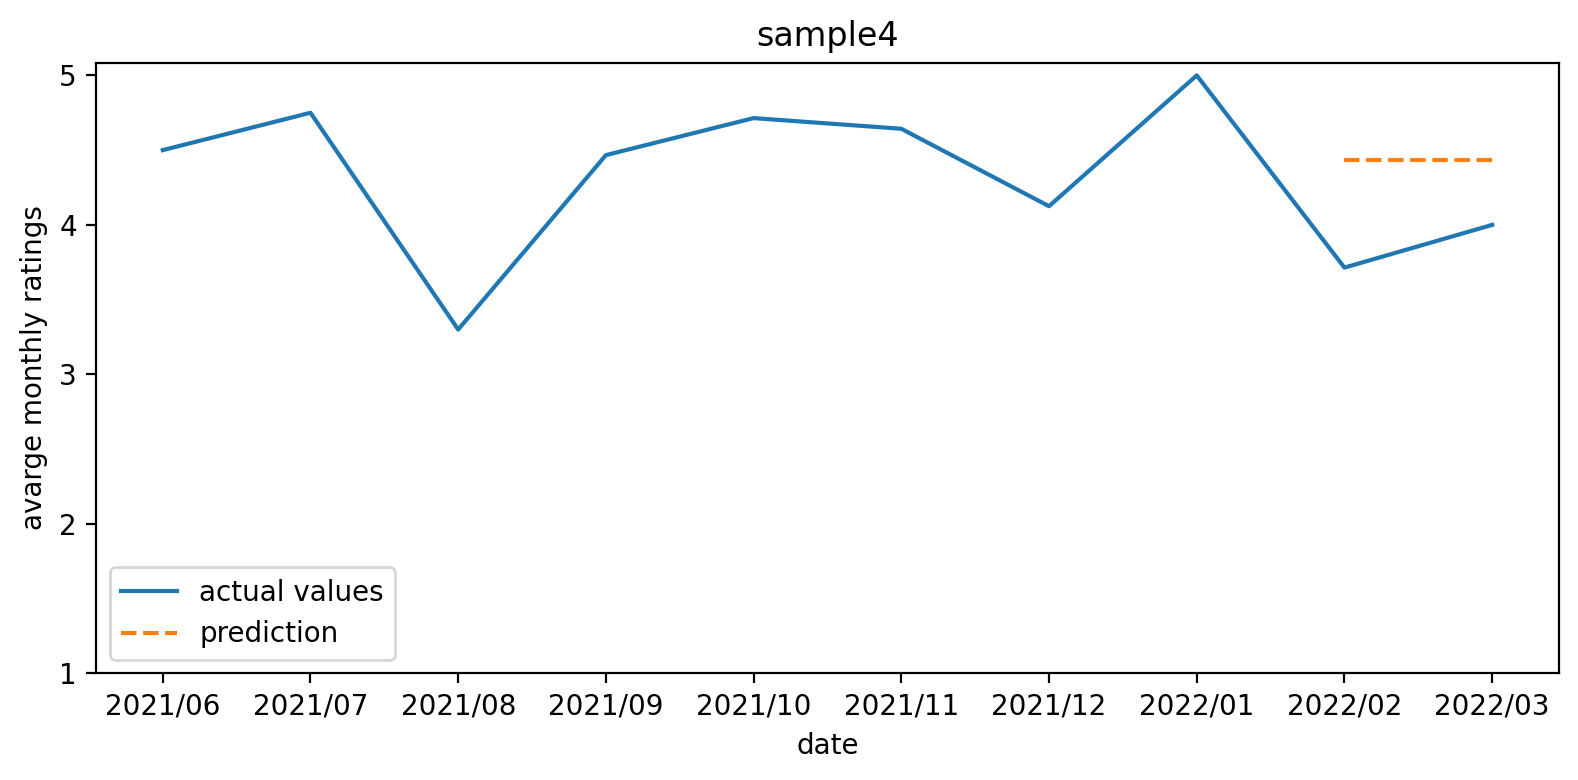

In [39]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample4.dropna(axis=0, inplace=True)
last_year_dates = df_sample4.index.to_list()
dates_last_months = df_sample4.index.to_list()[-2:]
last_year_monthly_mean = df_sample4.values.flatten().tolist()

ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample4['future_forecasting'][:2], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample4')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

the result's is not perfect, but that's okay since the dataset is small, seasonality search improved the results in some cases so let's add an optional parameter to allow the person using the model/API to decide to use it or not

# AR OR ARIMA 

In [40]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
def time_series_forecasting(json, sample, seasonality=False): 
    # reading the data
    df = pd.read_json(json)
    # remove dates outside of the dictionary e.g., a year ago
    df = df[df['date'].isin(text_to_date.keys())]
    # transform the dates from text to a text with the year and month e.g., a month ago --> 2022/04
    df["date"].replace(text_to_date, inplace=True)
    # getting the avarage rating for each month in the last year
    df = df.groupby(['date']).mean()
    # making sure there's at least 4 months with ratings
    if len(df) < 4:
        return None
    # compelte months with no rating, with nan values for now
    df = complete_months(df)
    # if there's months with no ratings at the start or end of the dataframe drop them
    first_idx = df.first_valid_index()
    last_idx = df.last_valid_index()
    df = df.loc[first_idx:last_idx]
    # filling missing values (months with no ratings) in the middle
    df.fillna(method='bfill', inplace=True)



    df = df[:int(df.shape[0] * 0.8)]

    warnings.filterwarnings("ignore")

    stationarityTest = adfuller(df.values, autolag='AIC')
    train_lag = []
    train_aci = []

    # if the is stationary use AR else use ARIMA
    if stationarityTest[1] > 0.05:
        for i in range(1, int(len(df)*0.4)):
            ar_model = AutoReg(df.values, lags=i).fit()
            train_lag.append(i)
            train_aci.append(ar_model.aic)
    
        min_value = train_aci.index(min(train_aci))
        lag_for_min = train_lag[min_value]
        ar_model = AutoReg(df.values, lags=lag_for_min).fit()
        forecasting = ar_model.predict(start=df.shape[0], end=df.shape[0]+2).clip(0, 5).tolist()
        print(f'{sample} used AR model with a lag value of {lag_for_min}')
    else:
        if seasonality:
            model = auto_arima(
                df.values.flatten(),
                start_p=0,
                start_q=0,
                max_p=6,
                max_q=6,
                start_P=0,
                start_Q=0,
                max_P=6,
                max_Q=6,
                random_state=12,
                seasonal=True, 
                m=4,
                D=None,
                seasonal_test='ch',
                stepwise=True 
            )
        else:
            model = auto_arima(
                df.values.flatten(),
                start_p=0,
                start_q=0,
                max_p=6,
                max_q=6,
                random_state=12, 
                seasonal=False,
                stepwise=True,
            )
        forecasting = model.predict(3).clip(0, 5).tolist()
        print(f'{sample} used ARIMA model with order of {model.order}')

    time_series = df.values.flatten().tolist()

    result = {
        "last_year_monthly_mean": time_series,
        "future_forecasting": forecasting
    }
    

    return result

In [41]:
data_json = json.dumps(sample1)
pred_sample1 = time_series_forecasting(data_json, 'sample1')
data_json = json.dumps(sample2)
pred_sample2 = time_series_forecasting(data_json, 'sample2')
data_json = json.dumps(sample3)
pred_sample3 = time_series_forecasting(data_json, 'sample3')
data_json = json.dumps(sample4)
pred_sample4 = time_series_forecasting(data_json, 'sample4')

sample1 used AR model with a lag value of 1
sample2 used AR model with a lag value of 1
sample3 used AR model with a lag value of 2
sample4 used ARIMA model with order of (1, 0, 1)


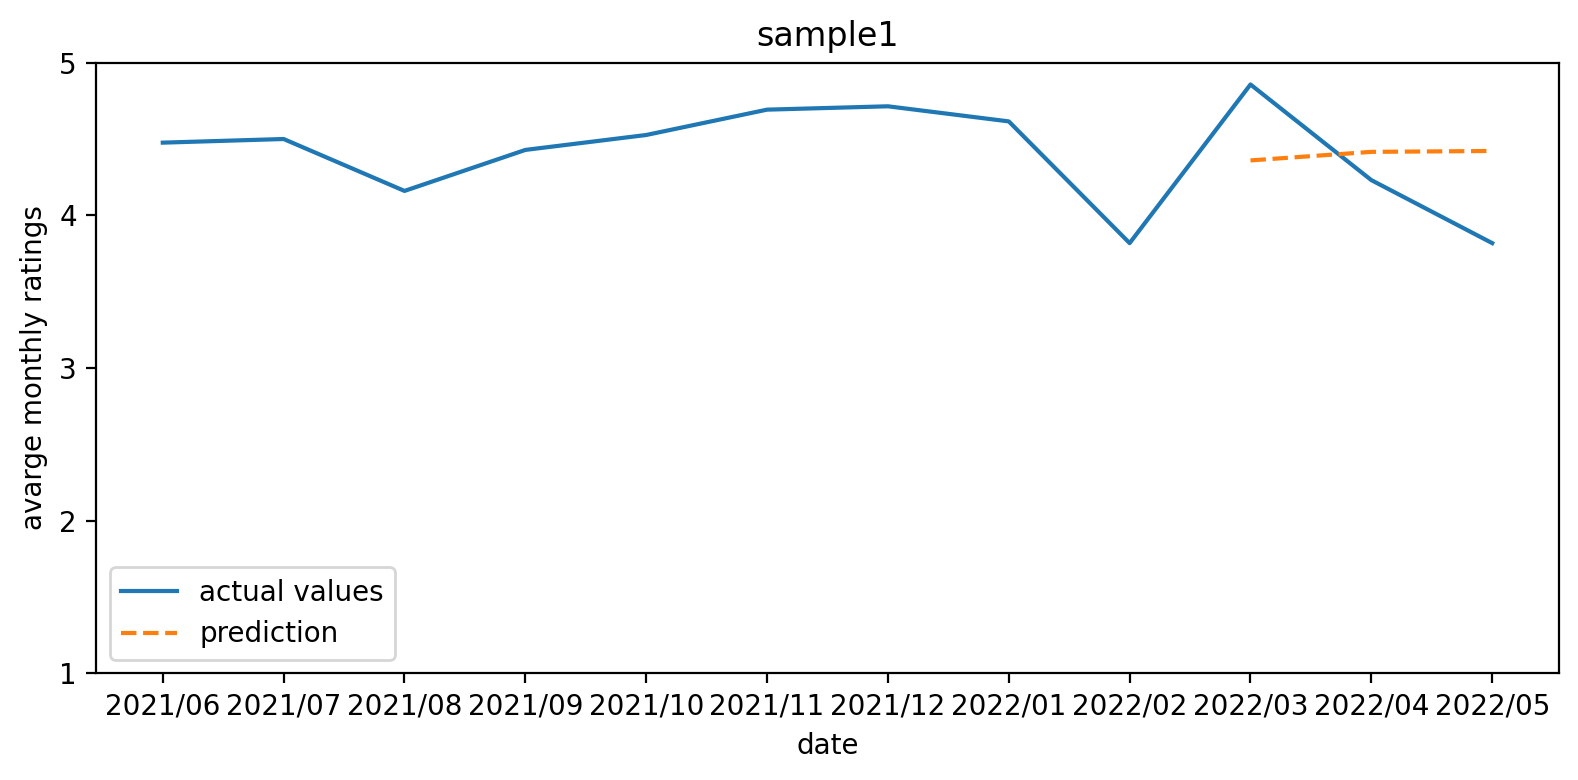

In [42]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample1.dropna(axis=0, inplace=True)
last_year_dates = df_sample1.index.to_list()
dates_last_months = df_sample1.index.to_list()[-3:]
last_year_monthly_mean = df_sample1.values.flatten().tolist()


ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample1['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample1')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

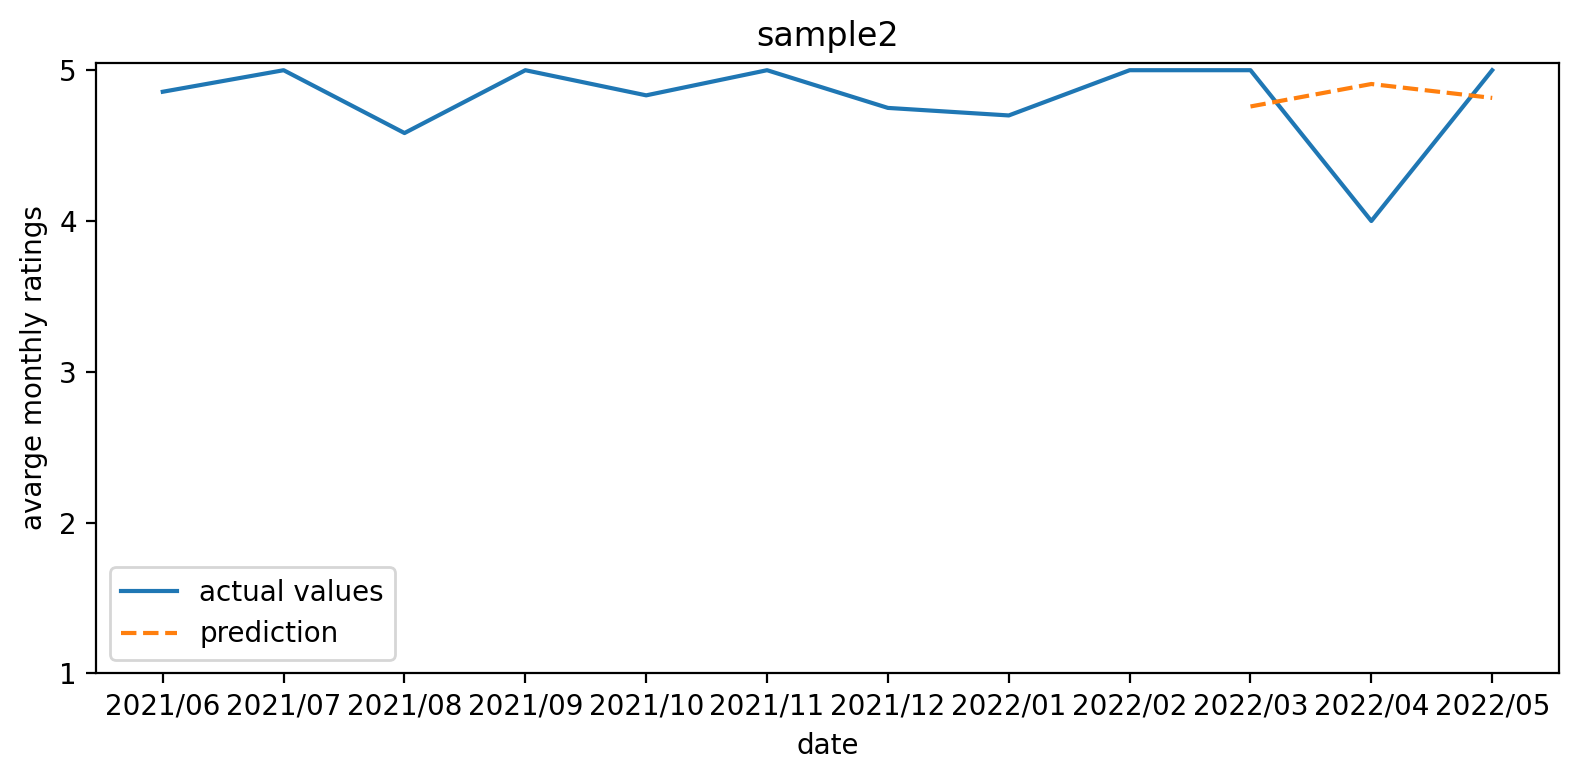

In [43]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample2.dropna(axis=0, inplace=True)
last_year_dates = df_sample2.index.to_list()
dates_last_months = df_sample2.index.to_list()[-3:]
last_year_monthly_mean = df_sample2.values.flatten().tolist()

ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample2['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample2')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

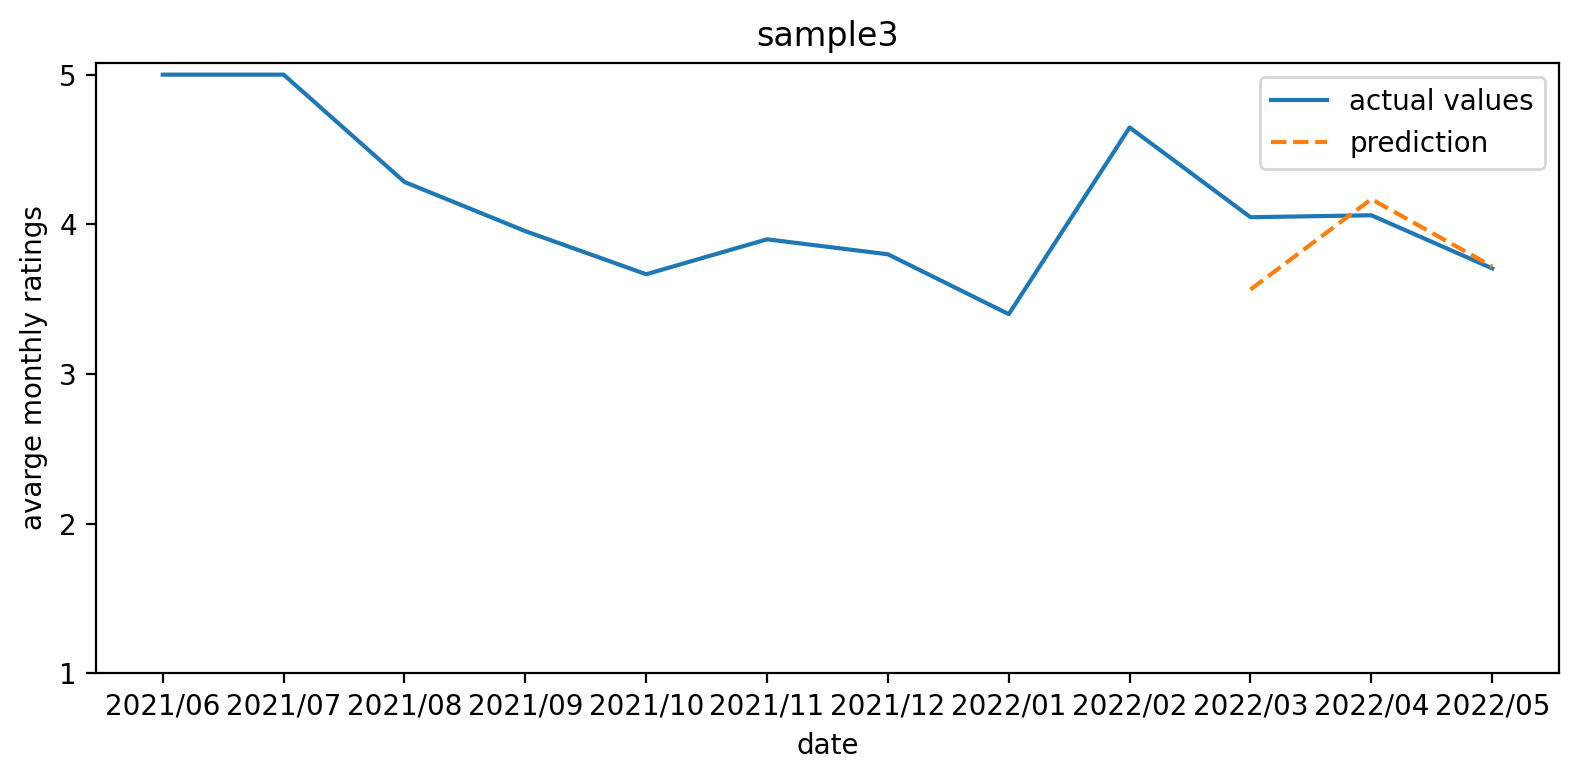

In [44]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample3.dropna(axis=0, inplace=True)
last_year_dates = df_sample3.index.to_list()
dates_last_months = df_sample3.index.to_list()[-3:]
last_year_monthly_mean = df_sample3.values.flatten().tolist()


ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample3['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample3')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

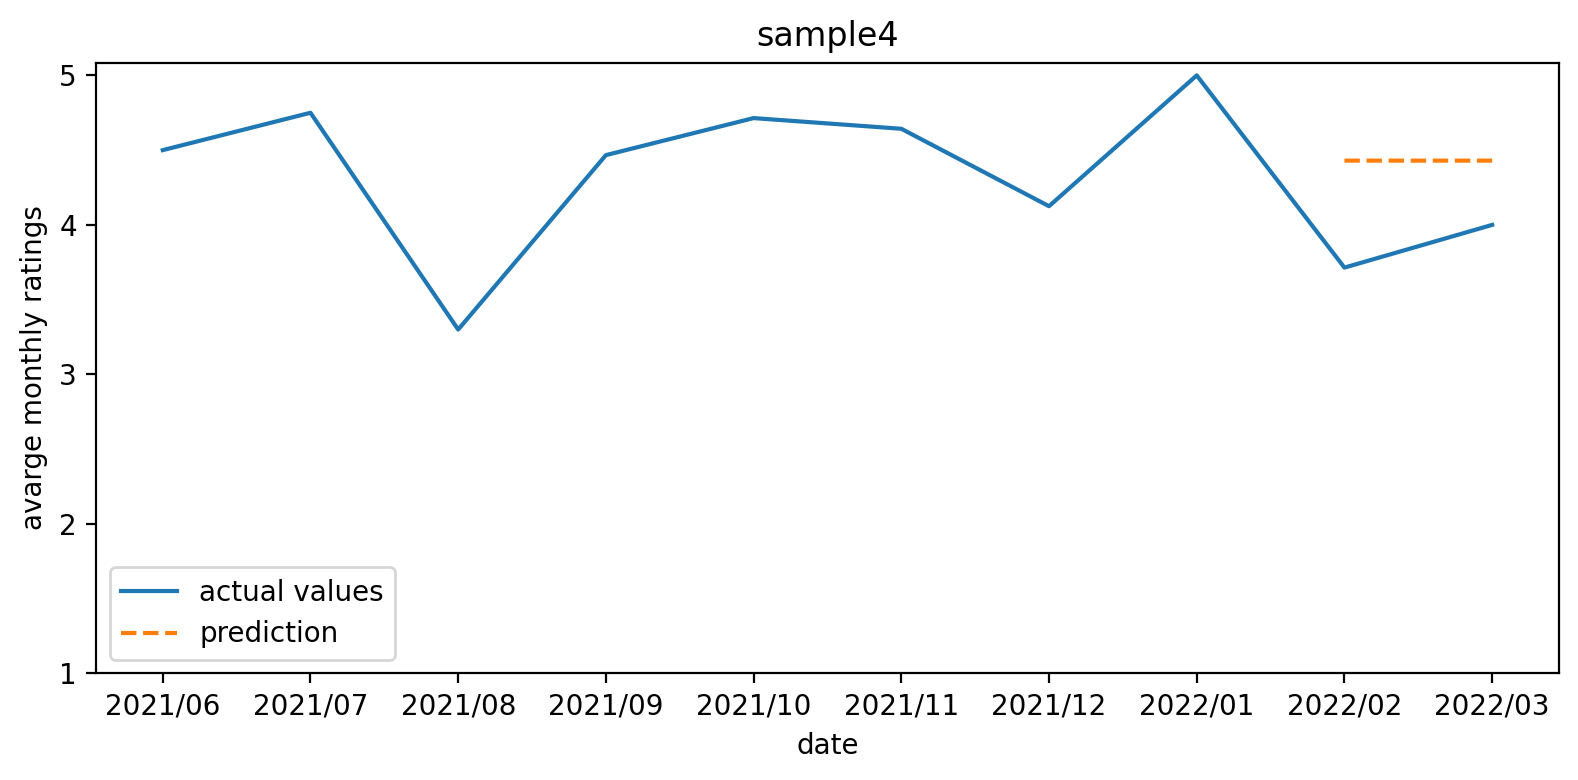

In [45]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample4.dropna(axis=0, inplace=True)
last_year_dates = df_sample4.index.to_list()
dates_last_months = df_sample4.index.to_list()[-2:]
last_year_monthly_mean = df_sample4.values.flatten().tolist()

ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample4['future_forecasting'][:2], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample4')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

only the first and third samples was completly stationary, and the results seems to be worse, although there's more variability, it's less accurate.

# MA OR ARIMA

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
def time_series_forecasting(json, sample, seasonality=False): 
    # reading the data
    df = pd.read_json(json)
    # remove dates outside of the dictionary e.g., a year ago
    df = df[df['date'].isin(text_to_date.keys())]
    # transform the dates from text to a text with the year and month e.g., a month ago --> 2022/04
    df["date"].replace(text_to_date, inplace=True)
    # getting the avarage rating for each month in the last year
    df = df.groupby(['date']).mean()
    # making sure there's at least 4 months with ratings
    if len(df) < 4:
        return None
    # compelte months with no rating, with nan values for now
    df = complete_months(df)
    # if there's months with no ratings at the start or end of the dataframe drop them
    first_idx = df.first_valid_index()
    last_idx = df.last_valid_index()
    df = df.loc[first_idx:last_idx]
    # filling missing values (months with no ratings) in the middle
    df.fillna(method='bfill', inplace=True)



    df = df[:int(df.shape[0] * 0.8)]



    warnings.filterwarnings("ignore")

    stationarityTest = adfuller(df.values, autolag='AIC')
    train_lag = []
    train_aci = []
    
    # if the is stationary use MA else use ARIMA
    if stationarityTest[1] > 0.05:
        for i in range(1, int(len(df)*0.4)):
            ar_model = ARIMA(df.values, order=(0, 0, i)).fit()
            train_lag.append(i)
            train_aci.append(ar_model.aic)
    
        min_value = train_aci.index(min(train_aci))
        lag_for_min = train_lag[min_value]
        ar_model = ARIMA(df.values, order=(0, 0, i)).fit()
        forecasting = ar_model.predict(start=df.shape[0], end=df.shape[0]+2).clip(0, 5).tolist()
        print(f'{sample} used MA model with a lag value of {lag_for_min}')
    else:
        if seasonality:
            model = auto_arima(
                df.values.flatten(),
                start_p=0,
                start_q=0,
                max_p=6,
                max_q=6,
                start_P=0,
                start_Q=0,
                max_P=6,
                max_Q=6,
                random_state=12,
                seasonal=True, 
                m=4,
                D=None,
                seasonal_test='ch',
                stepwise=True 
            )
        else:
            model = auto_arima(
                df.values.flatten(),
                start_p=0,
                start_q=0,
                max_p=6,
                max_q=6,
                random_state=12, 
                seasonal=False,
                stepwise=True,
            )
        forecasting = model.predict(3).clip(0, 5).tolist()
        print(f'{sample} used ARIMA model with order of {model.order}')

    time_series = df.values.flatten().tolist()

    result = {
        "last_year_monthly_mean": time_series,
        "future_forecasting": forecasting
    }
    

    return result

In [47]:
data_json = json.dumps(sample1)
pred_sample1 = time_series_forecasting(data_json, 'sample1')
data_json = json.dumps(sample2)
pred_sample2 = time_series_forecasting(data_json, 'sample2')
data_json = json.dumps(sample3)
pred_sample3 = time_series_forecasting(data_json, 'sample3')
data_json = json.dumps(sample4)
pred_sample4 = time_series_forecasting(data_json, 'sample4')

sample1 used MA model with a lag value of 2
sample2 used MA model with a lag value of 2
sample3 used MA model with a lag value of 1
sample4 used ARIMA model with order of (1, 0, 1)


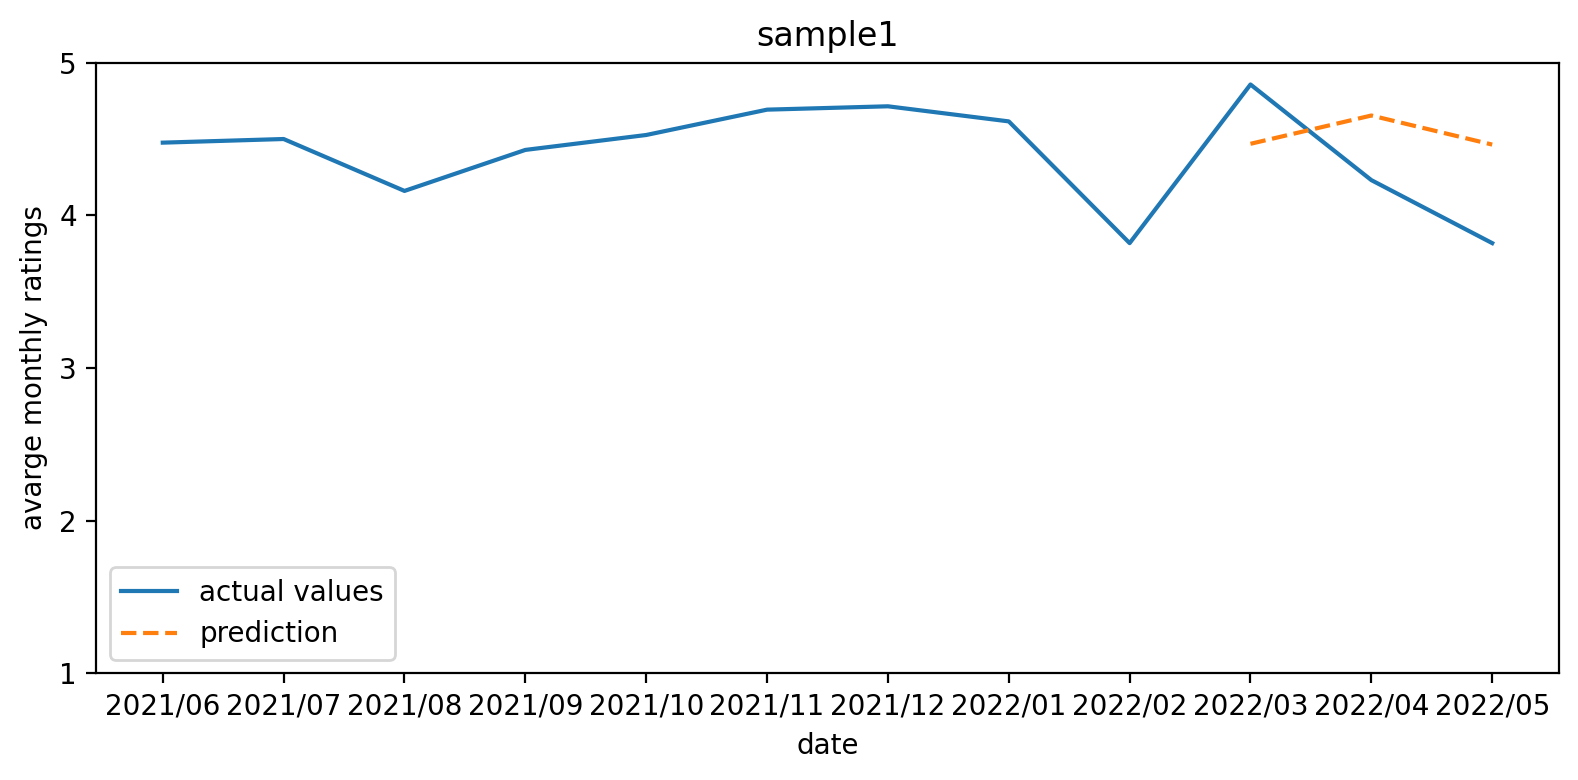

In [48]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample1.dropna(axis=0, inplace=True)
last_year_dates = df_sample1.index.to_list()
dates_last_months = df_sample1.index.to_list()[-3:]
last_year_monthly_mean = df_sample1.values.flatten().tolist()


ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample1['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample1')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

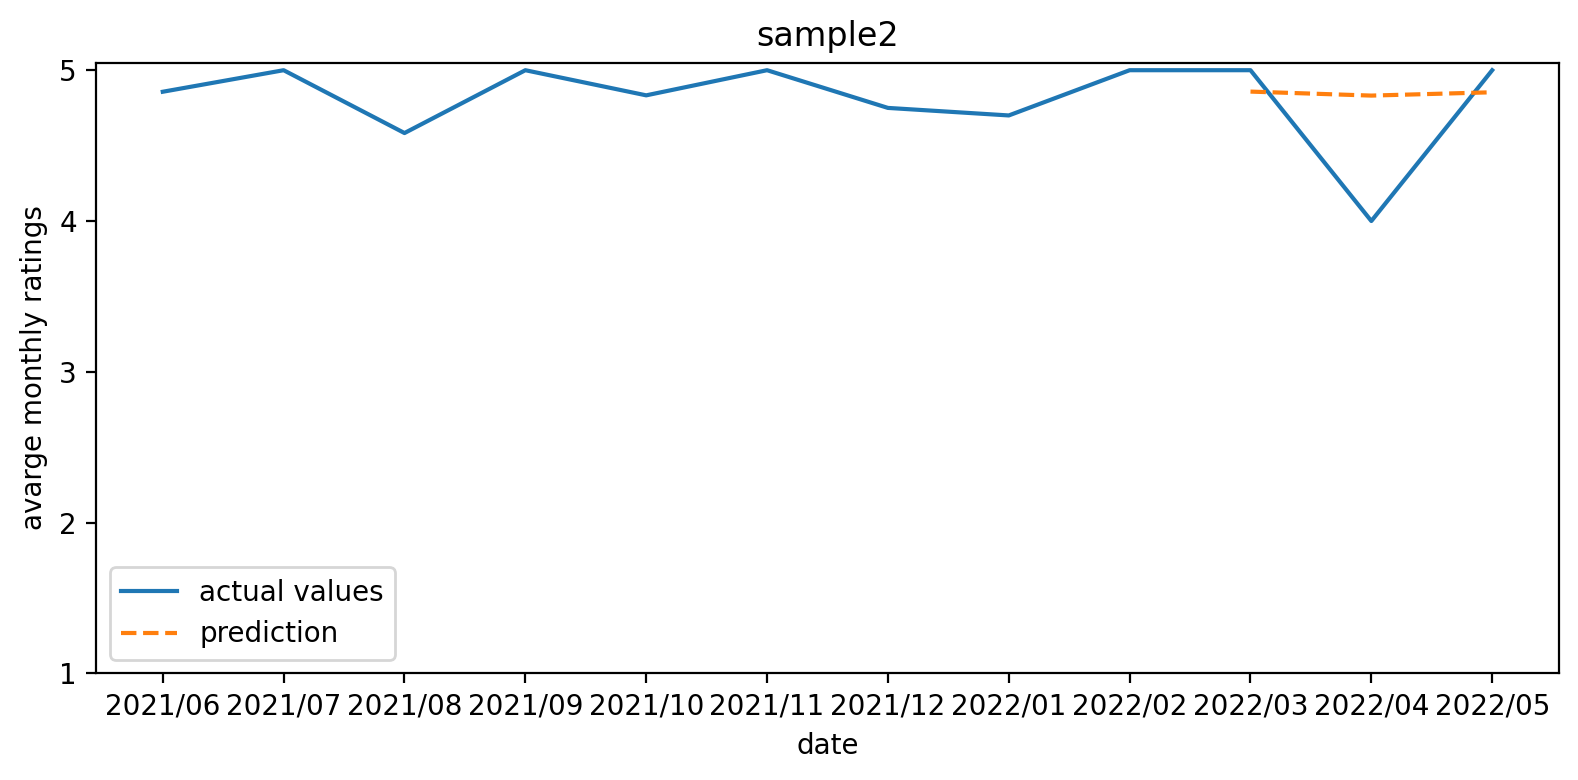

In [49]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample2.dropna(axis=0, inplace=True)
last_year_dates = df_sample2.index.to_list()
dates_last_months = df_sample2.index.to_list()[-3:]
last_year_monthly_mean = df_sample2.values.flatten().tolist()

ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample2['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample2')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

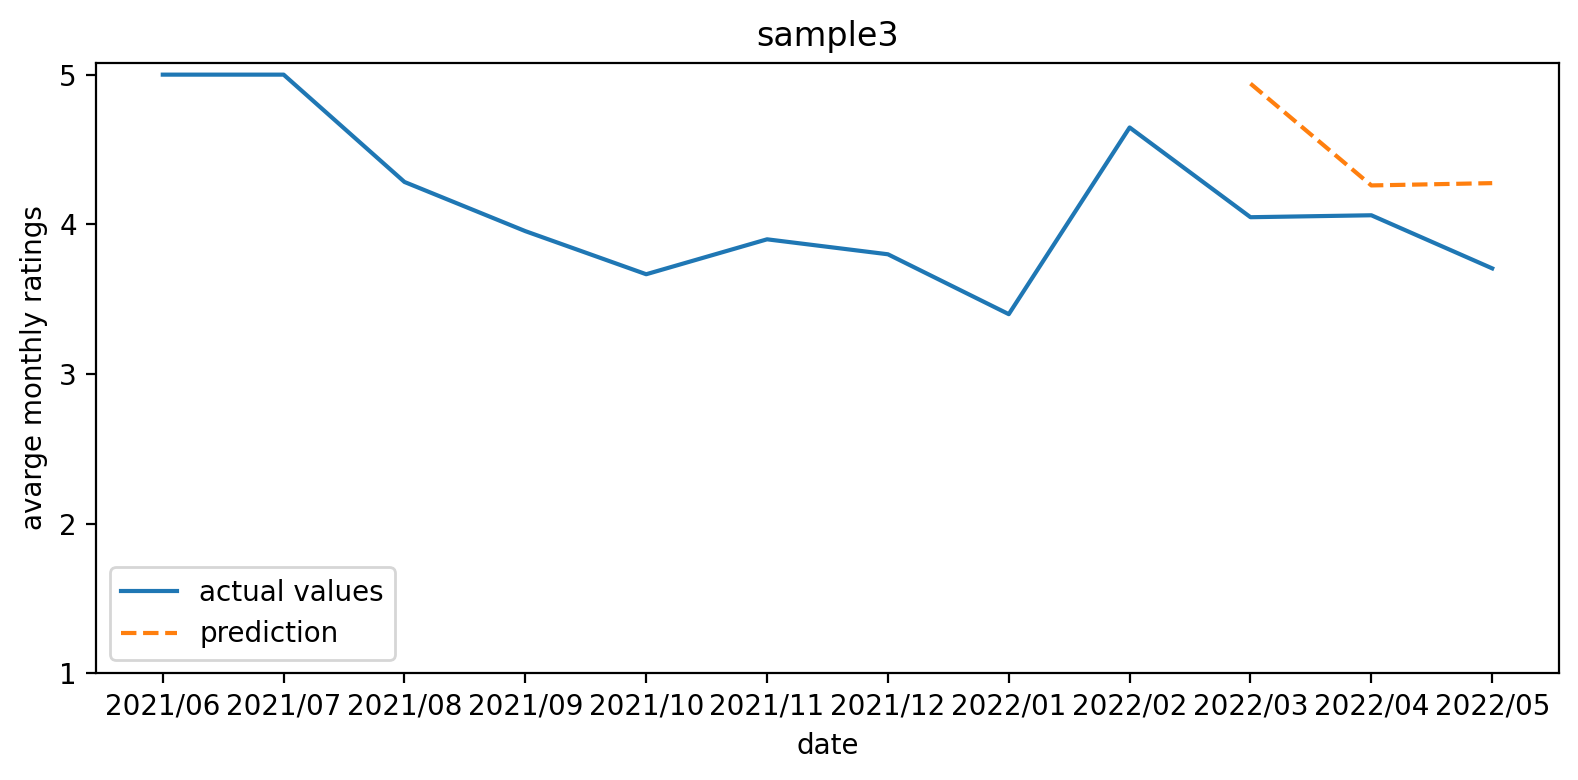

In [50]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample3.dropna(axis=0, inplace=True)
last_year_dates = df_sample3.index.to_list()
dates_last_months = df_sample3.index.to_list()[-3:]
last_year_monthly_mean = df_sample3.values.flatten().tolist()


ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample3['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample3')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

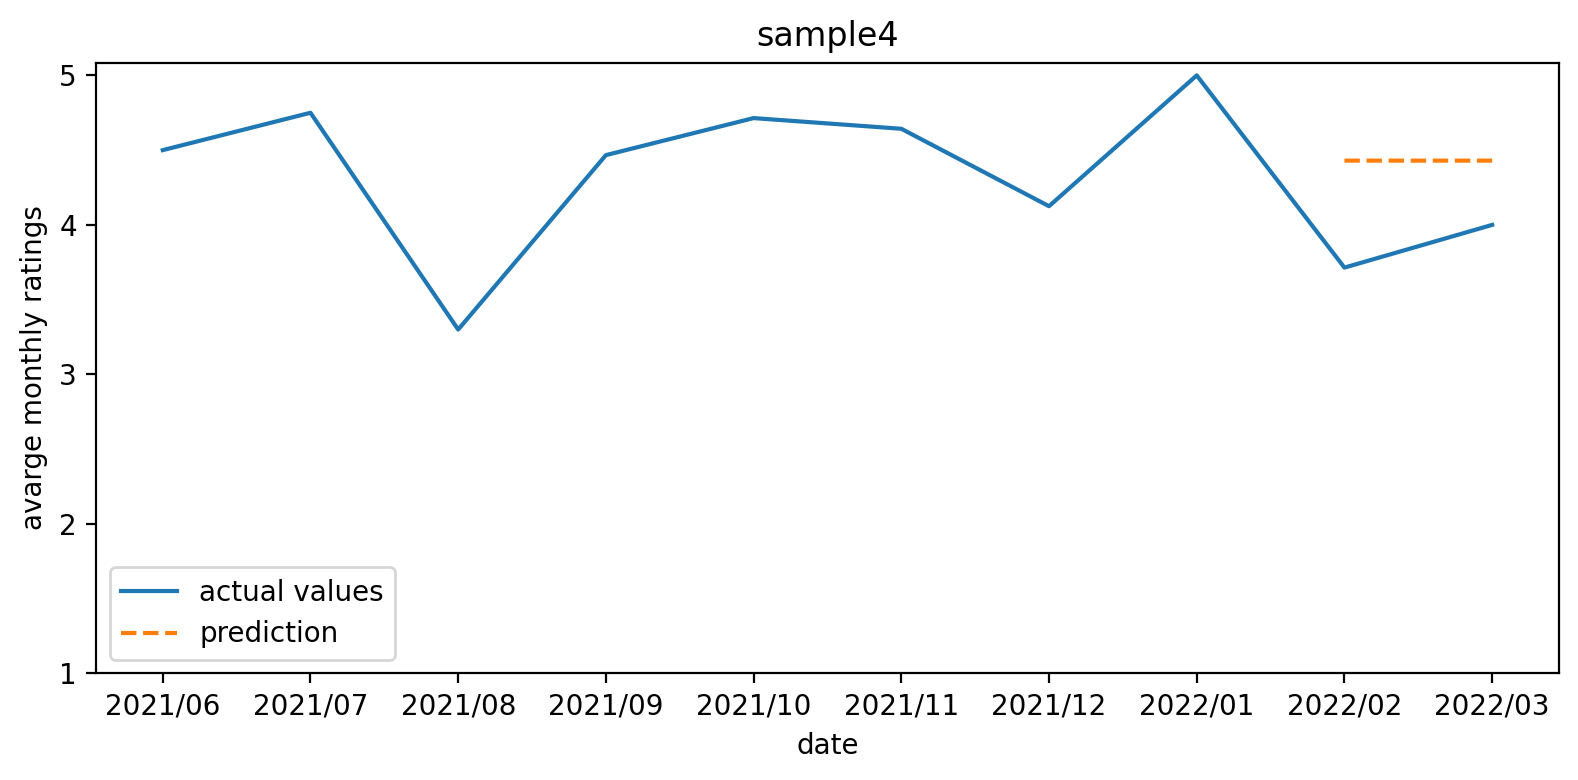

In [51]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample4.dropna(axis=0, inplace=True)
last_year_dates = df_sample4.index.to_list()
dates_last_months = df_sample4.index.to_list()[-2:]
last_year_monthly_mean = df_sample4.values.flatten().tolist()

ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample4['future_forecasting'][:2], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample4')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

the same results in AR, only the first and third samples was completly stationary, and the results seems to be worse, although there's more variability it's less accurate.

only the first and third samples was completly stationary, and the results seems to be worse, although there's more variability, it's less accurate.

# Linear regression

In [75]:
from sklearn.linear_model import LinearRegression
def time_series_forecasting(json): 
    # reading the data
    df = pd.read_json(json)
    # transform the dates from text to a text with the year and month e.g., a month ago --> 2022/04
    df["date"].replace(text_to_date, inplace=True)
    # getting the avarage rating for each month in the last year
    df = df.groupby(['date']).mean()
    # making sure there's at least 4 months with ratings
    if len(df) < 4:
        return None
    # compelte months with no rating, with nan values for now
    df = complete_months(df)
    # if there's months with no ratings at the start or end of the dataframe drop them
    first_idx = df.first_valid_index()
    last_idx = df.last_valid_index()
    df = df.loc[first_idx:last_idx]
    # filling missing values (months with no ratings) in the middle
    df.fillna(method='bfill', inplace=True)

    df = df[:int(df.shape[0] * 0.8)]

    warnings.filterwarnings("ignore")

    model = LinearRegression()

    X = np.array([x for x in range(1, len(df)+1)]).reshape(-1, 1)
    model.fit(X, df.values.reshape(-1, 1))
    X_pred = np.array([x for x in range(len(df)+2, len(df)+5)]).reshape(-1, 1)
    forecasting = model.predict(X_pred)

    time_series = df.values.flatten().tolist()

    result = {
        "last_year_monthly_mean": time_series,
        "future_forecasting": forecasting
    }
    

    return result

In [77]:
data_json = json.dumps(sample1)
pred_sample1 = time_series_forecasting(data_json)
data_json = json.dumps(sample2)
pred_sample2 = time_series_forecasting(data_json)
data_json = json.dumps(sample3)
pred_sample3 = time_series_forecasting(data_json)
data_json = json.dumps(sample4)
pred_sample4 = time_series_forecasting(data_json)

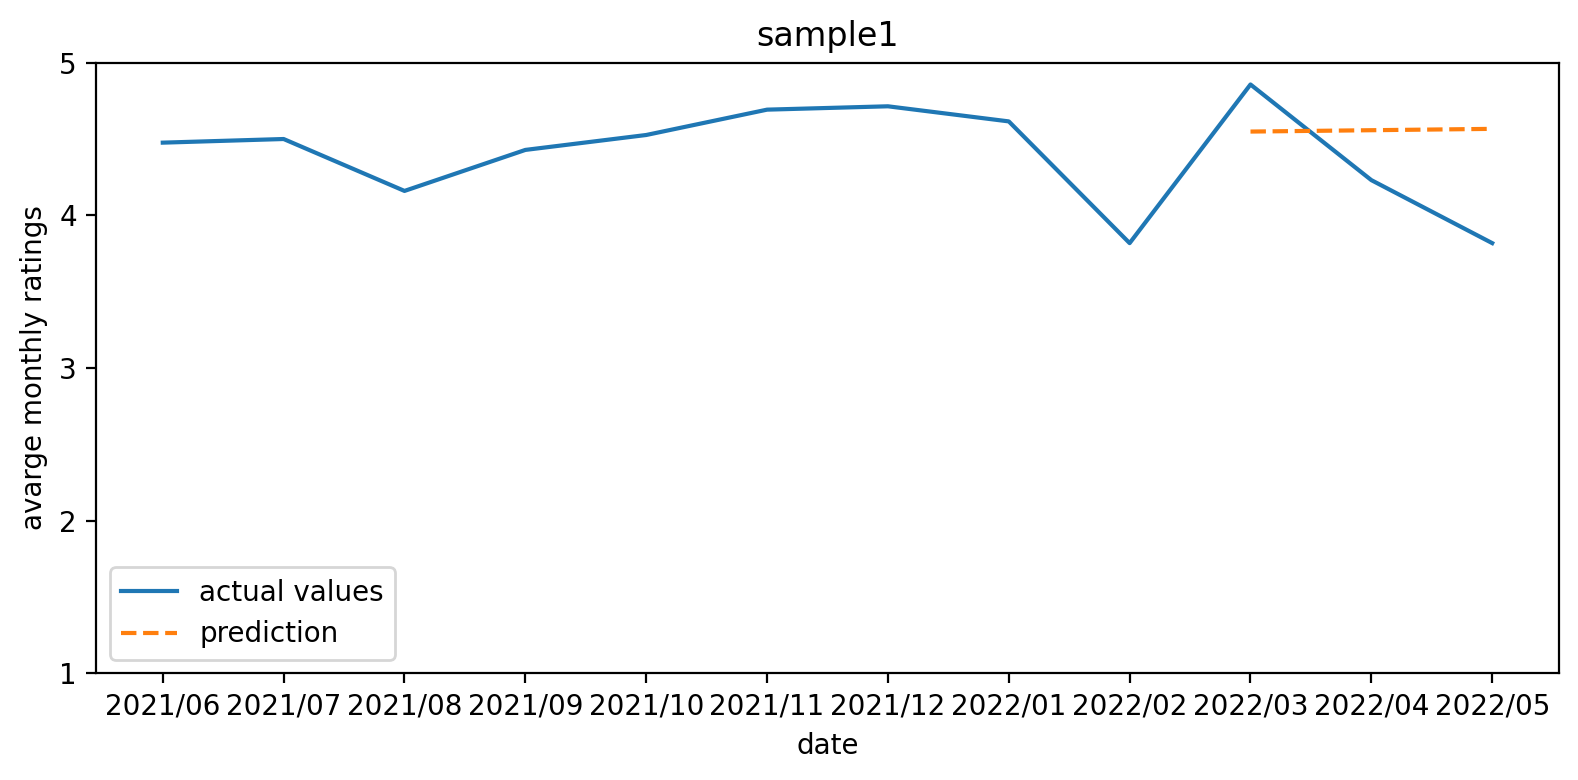

In [78]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample1.dropna(axis=0, inplace=True)
last_year_dates = df_sample1.index.to_list()
dates_last_months = df_sample1.index.to_list()[-3:]
last_year_monthly_mean = df_sample1.values.flatten().tolist()


ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample1['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample1')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

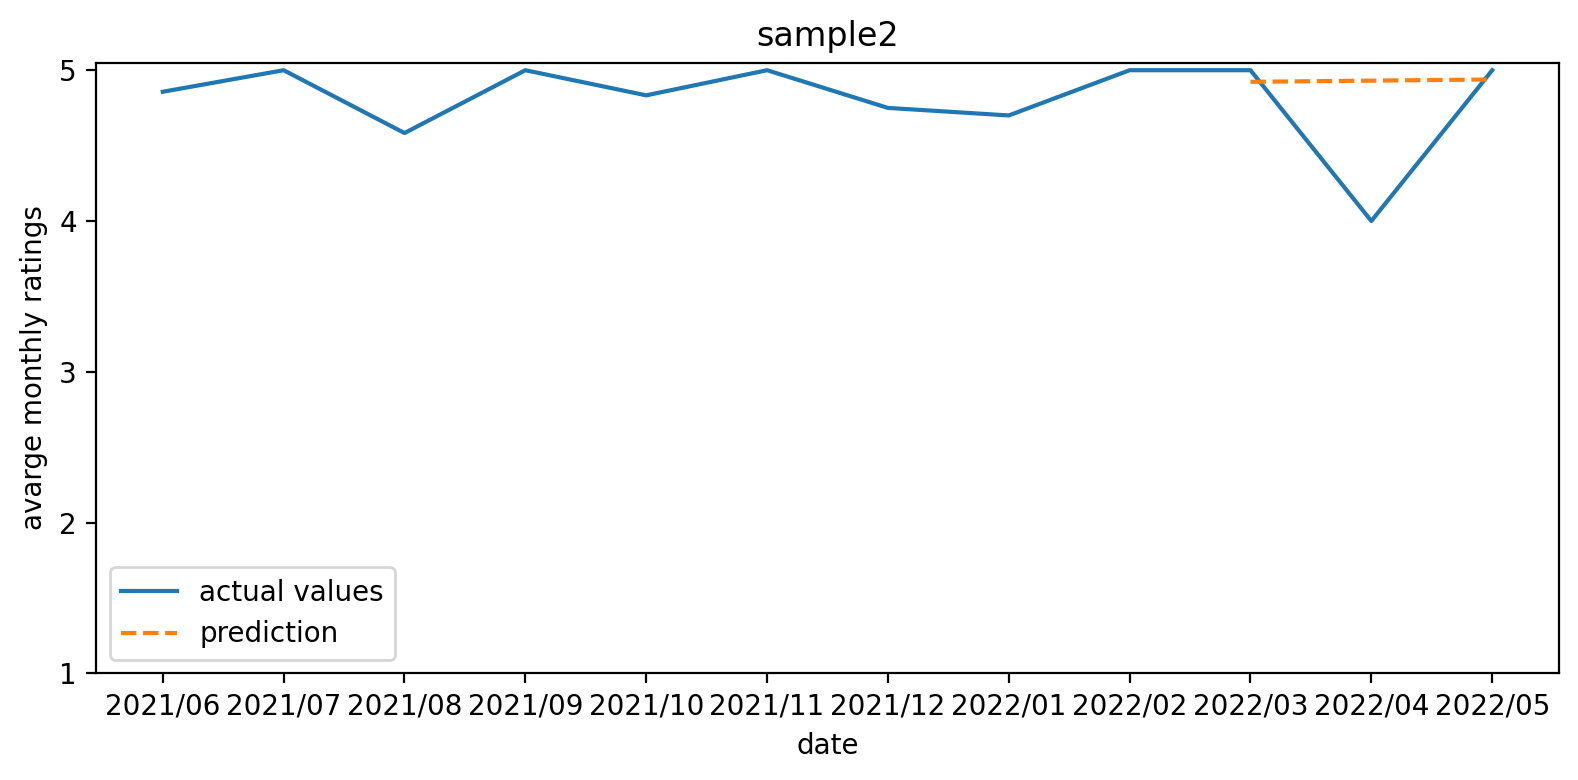

In [79]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample2.dropna(axis=0, inplace=True)
last_year_dates = df_sample2.index.to_list()
dates_last_months = df_sample2.index.to_list()[-3:]
last_year_monthly_mean = df_sample2.values.flatten().tolist()

ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample2['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample2')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

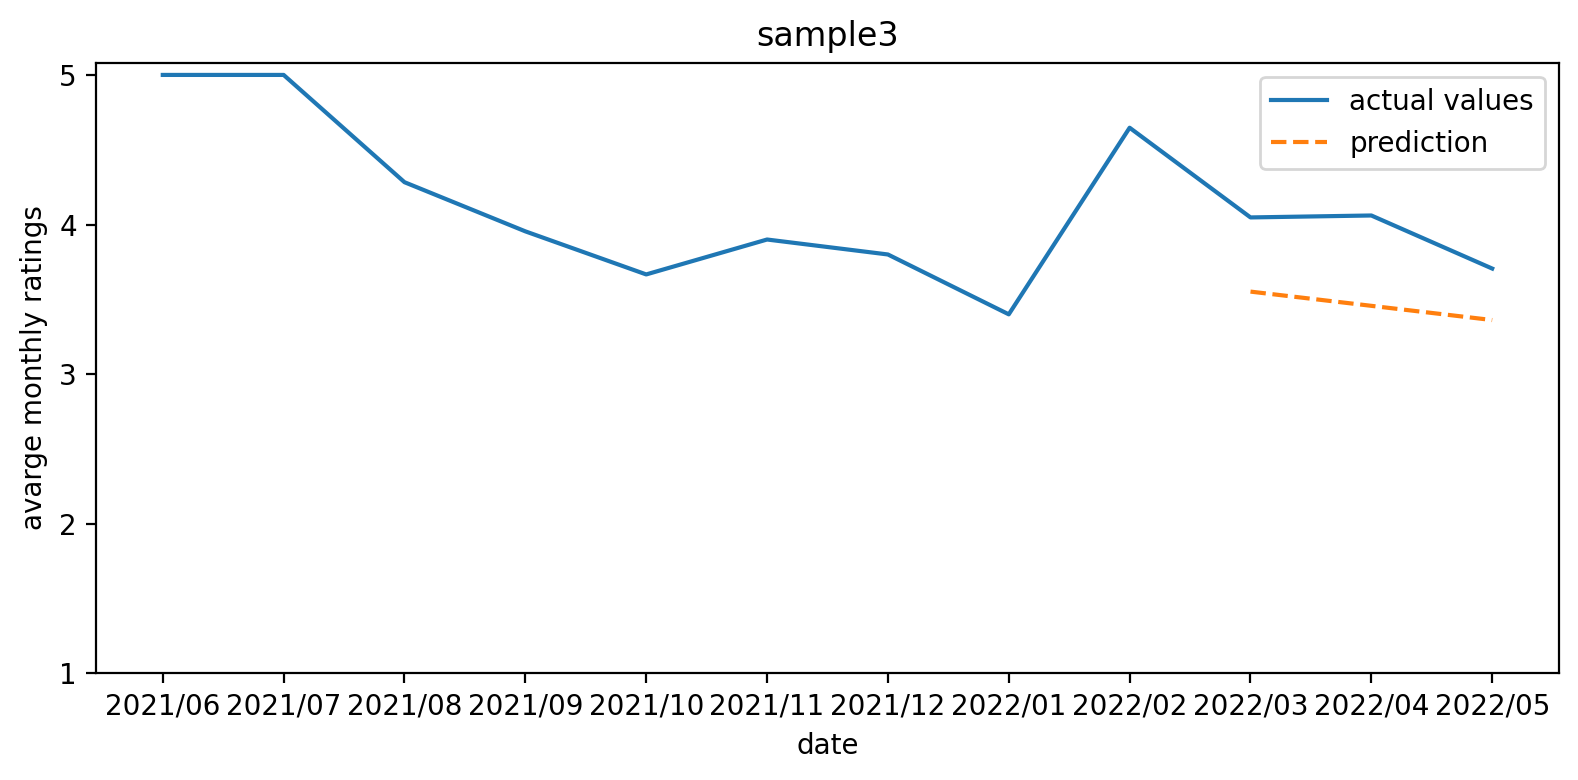

In [80]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample3.dropna(axis=0, inplace=True)
last_year_dates = df_sample3.index.to_list()
dates_last_months = df_sample3.index.to_list()[-3:]
last_year_monthly_mean = df_sample3.values.flatten().tolist()


ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample3['future_forecasting'], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample3')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()

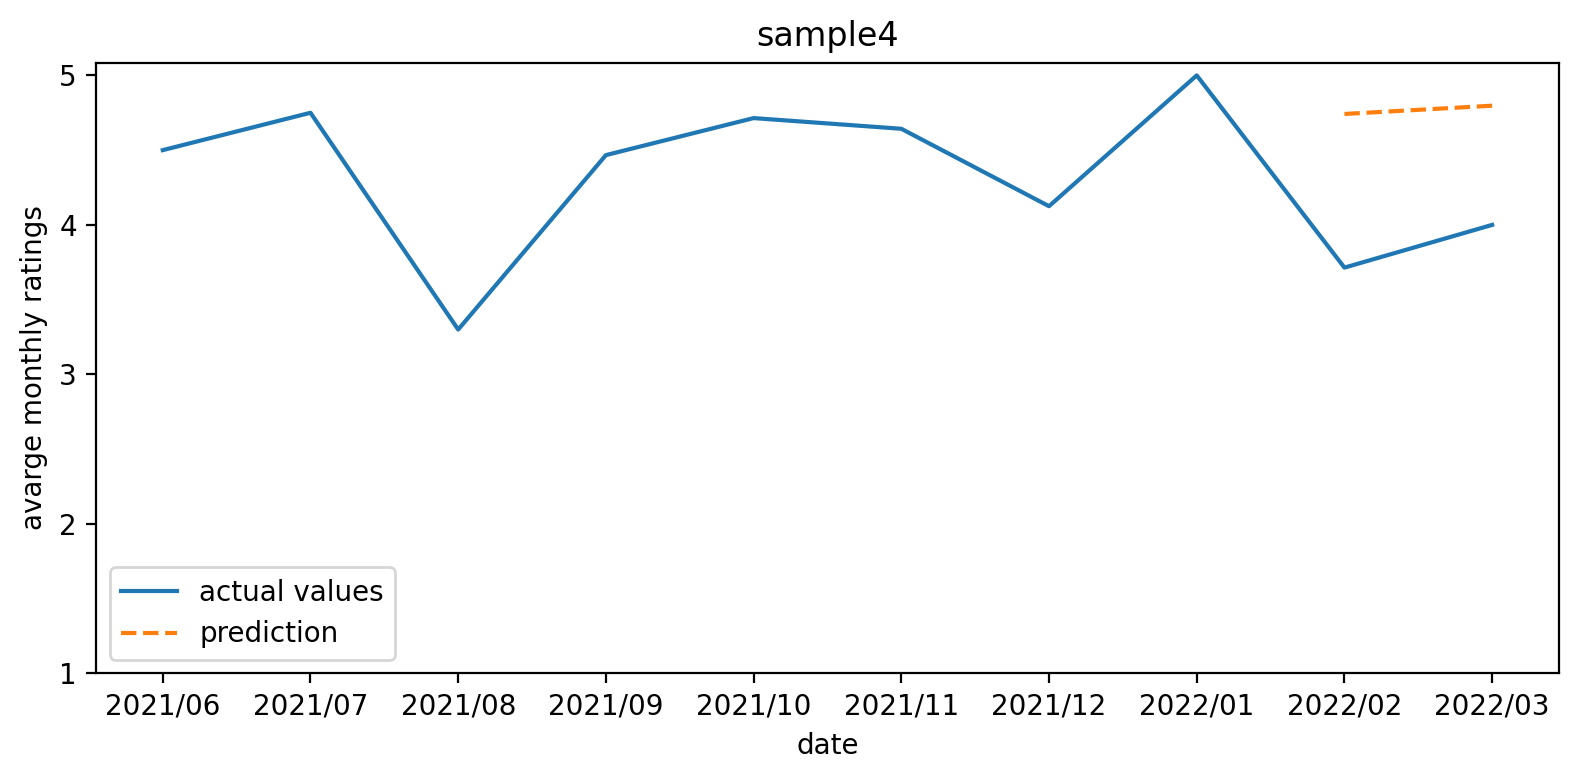

In [81]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

df_sample4.dropna(axis=0, inplace=True)
last_year_dates = df_sample4.index.to_list()
dates_last_months = df_sample4.index.to_list()[-2:]
last_year_monthly_mean = df_sample4.values.flatten().tolist()

ax.plot(last_year_dates, last_year_monthly_mean, label="actual values")
ax.plot(dates_last_months, pred_sample4['future_forecasting'][:2], label="prediction", linestyle="--")
ax.legend()

y = [1, 2, 3, 4, 5]
ax.set_yticks(y)

ax.set_title('sample4')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()